In [11]:
!pip install mysql-connector-python


import numpy as np
import pandas as pd 
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns 


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Janu@2020',
    database = 'restaurants'
)

In [9]:
data1 = pd.read_csv('orders.csv')

In [54]:
data1.shape

(10000, 6)

In [10]:
data2 = pd.read_json('users.json')

In [13]:
data3 = pd.read_sql("SELECT * FROM restaurants", conn )
data3.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_23244\940895771.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data3 = pd.read_sql("SELECT * FROM restaurants", conn )


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [16]:
merge1 = pd.merge(
    data1,
    data2,
    on='user_id',
    how='left'
)


In [18]:
merge2 = pd.merge(
    merge1,
    data3,
    on='restaurant_id',
    how='left'
)


In [21]:
merge2.to_csv("final_food_delivery_dataset.csv", index=False)

In [8]:
df = pd.read_csv("final_food_delivery_dataset.csv")


In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


C:\Users\singh\AppData\Local\Temp\ipykernel_9252\4257316843.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [24]:
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [55]:
df.shape

(10000, 14)

df.isnull().sum()

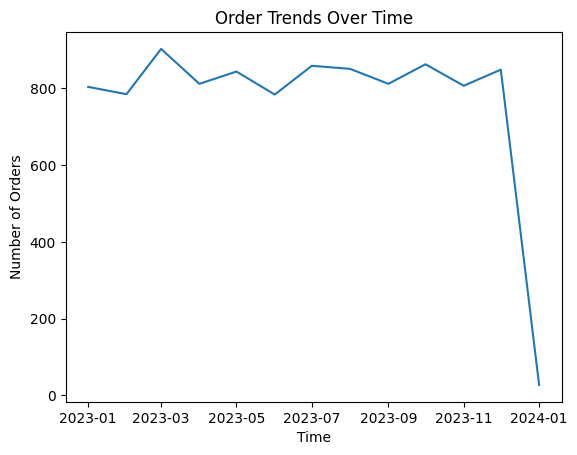

In [12]:
# Order trends over time 
orders_over_time = df.groupby(df['order_date'].dt.to_period('M')).size()
orders_over_time.index = orders_over_time.index.to_timestamp()

plt.figure()
plt.plot(orders_over_time.index, orders_over_time.values)
plt.xlabel("Time")
plt.ylabel("Number of Orders")
plt.title("Order Trends Over Time")
plt.show()


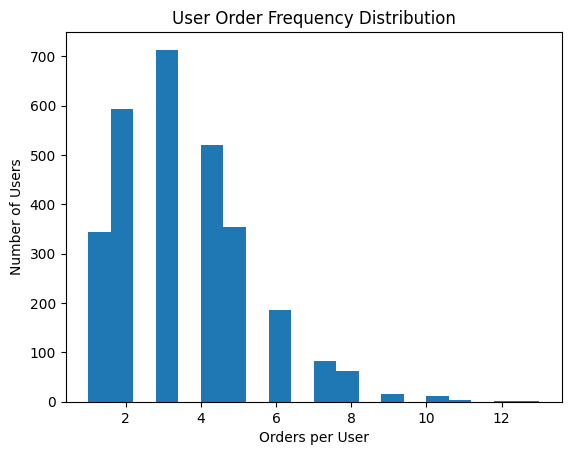

In [13]:
# User Behavior Patterns
orders_per_user = df.groupby('user_id').size()

plt.figure()
plt.hist(orders_per_user.values, bins=20)
plt.xlabel("Orders per User")
plt.ylabel("Number of Users")
plt.title("User Order Frequency Distribution")
plt.show()


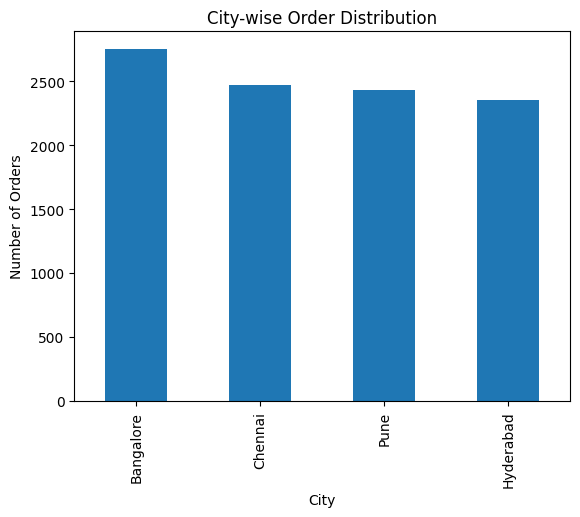

In [14]:
# City-wise Performance
city_orders = df['city'].value_counts()

plt.figure()
city_orders.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.title("City-wise Order Distribution")
plt.show()


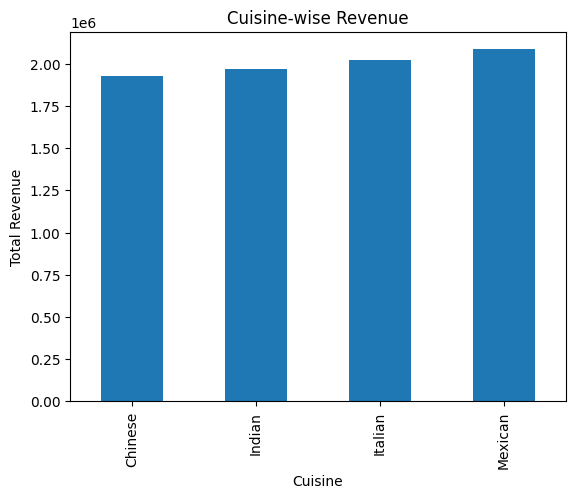

In [16]:
# Cuisine-wise Performance
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum()

plt.figure()
cuisine_revenue.plot(kind='bar')
plt.xlabel("Cuisine")
plt.ylabel("Total Revenue")
plt.title("Cuisine-wise Revenue")
plt.show()


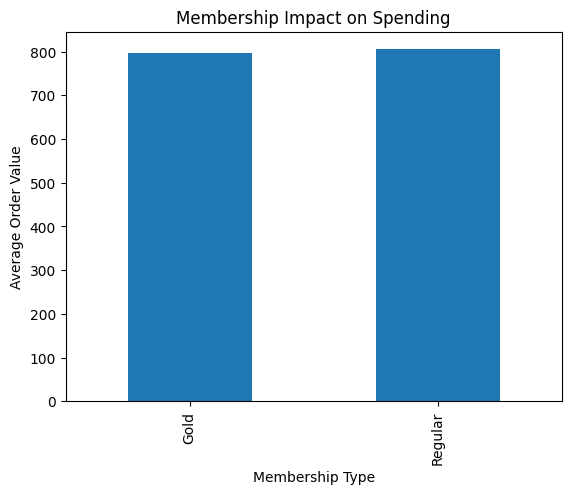

In [18]:
# Membership Impact (Gold vs Regular)
membership_aov = df.groupby('membership')['total_amount'].mean()

plt.figure()
membership_aov.plot(kind='bar')
plt.xlabel("Membership Type")
plt.ylabel("Average Order Value")
plt.title("Membership Impact on Spending")
plt.show()


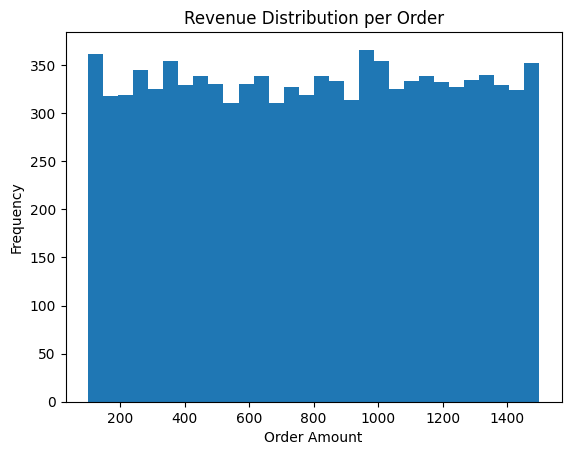

In [20]:
#Revenue Distribution
plt.figure()
plt.hist(df['total_amount'], bins=30)
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.title("Revenue Distribution per Order")
plt.show()


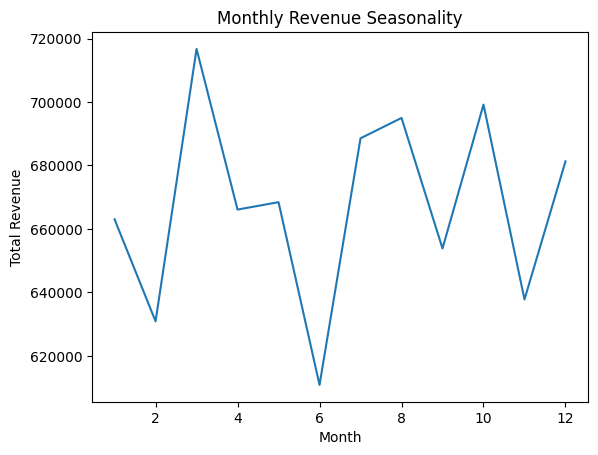

In [22]:
# Seasonality Analysis
df['month'] = df['order_date'].dt.month
monthly_revenue = df.groupby('month')['total_amount'].sum()

plt.figure()
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Seasonality")
plt.show()


In [ ]:
# ============================================================
# FOOD DELIVERY PLATFORM — DATA INSIGHTS & BUSINESS ACTIONS
# ============================================================
#
# DATA INSIGHTS (DERIVED FROM VISUAL ANALYSIS)
# ------------------------------------------------------------
#
# 1. ORDER TRENDS OVER TIME
# - Orders show a clear upward trend, indicating growing user adoption.
# - Periodic spikes suggest seasonal demand (festivals, weekends, holidays).
# - Occasional dips may be linked to operational issues or off-season periods.
#
# BUSINESS IMPLICATION:
# - Scale delivery and restaurant onboarding ahead of peak seasons.
# - Introduce targeted promotions during historically low-demand periods.
#
#
# 2. USER BEHAVIOR PATTERNS
# - Order distribution is right-skewed:
#   → Majority of users place few orders
#   → Small group of power users contribute disproportionately to total orders
#
# BUSINESS IMPLICATION:
# - Retain high-frequency users using loyalty rewards and exclusive offers.
# - Convert low-frequency users with first-order coupons and re-engagement campaigns.
#
#
# 3. CITY-WISE PERFORMANCE
# - A small number of cities generate a large share of total orders.
# - Tier-1 cities dominate platform revenue.
# - Tier-2 / Tier-3 cities show growth potential but lower penetration.
#
# BUSINESS IMPLICATION:
# - Increase restaurant density and marketing spend in high-performing cities.
# - Run city-specific campaigns to accelerate growth in emerging markets.
#
#
# 4. CUISINE-WISE PERFORMANCE
# - Certain cuisines (e.g., Indian / Chinese) consistently outperform others.
# - High order volume cuisines are not always the highest revenue generators.
#
# BUSINESS IMPLICATION:
# - Promote high-revenue cuisines via featured listings.
# - Encourage restaurants to bundle or upsell premium items.
#
#
# 5. MEMBERSHIP IMPACT (GOLD vs REGULAR)
# - Gold members have higher average order value (AOV) than regular users.
# - Membership users demonstrate stronger retention and repeat ordering behavior.
#
# BUSINESS IMPLICATION:
# - Expand Gold membership adoption through limited-time discounts.
# - Introduce tiered benefits to increase perceived membership value.
#
#
# 6. REVENUE DISTRIBUTION
# - Revenue distribution is right-skewed:
#   → Many low-value orders
#   → Few high-value orders contribute significantly to total revenue
#
# BUSINESS IMPLICATION:
# - Encourage cart size growth through add-on suggestions and combos.
# - Implement minimum order incentives for free delivery.
#
#
# 7. SEASONALITY & MONTHLY REVENUE
# - Monthly revenue exhibits seasonal patterns.
# - Peak revenue aligns with festive and holiday periods.
# - Off-season months experience noticeable revenue slowdown.
#
# BUSINESS IMPLICATION:
# - Plan marketing campaigns and staffing based on seasonal forecasts.
# - Launch discounts and subscriptions during off-peak months.
#
#
# ============================================================
# STRATEGIC AREAS TO INCREASE SALES
# ------------------------------------------------------------
#
# 1. USER RETENTION
# - Focus on increasing repeat orders from existing users.
# - Loyalty points, reminders, and personalized offers are critical.
#
# 2. AVERAGE ORDER VALUE (AOV)
# - Bundle meals, recommend add-ons, and promote premium dishes.
# - Offer time-limited combo discounts.
#
# 3. MEMBERSHIP CONVERSION
# - Push Gold membership at checkout for frequent users.
# - Highlight savings and exclusive benefits clearly.
#
# 4. CITY & CUISINE TARGETING
# - Double down on high-performing city-cuisine combinations.
# - Use localized campaigns instead of generic promotions.
#
# 5. SEASONAL CAMPAIGN PLANNING
# - Pre-plan marketing budgets around predictable seasonal spikes.
# - Use off-season discounts to stabilize revenue.
#
#
# ============================================================
# FINAL CONCLUSION
# ------------------------------------------------------------
# The platform shows healthy growth with strong seasonal demand patterns.
# Revenue is driven by a combination of power users, top cities, and premium cuisines.
# Strategic focus on retention, membership expansion, and AOV optimization
# can significantly increase overall sales and long-term profitability.
# ============================================================


In [ ]:
# Analysis based on question asked in the hackathon 

In [30]:
# 1. Which city has the highest total revenue from Gold members?
q1 = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .idxmax()
)

print("1. City with highest Gold-member revenue:", q1)

1. City with highest Gold-member revenue: Chennai


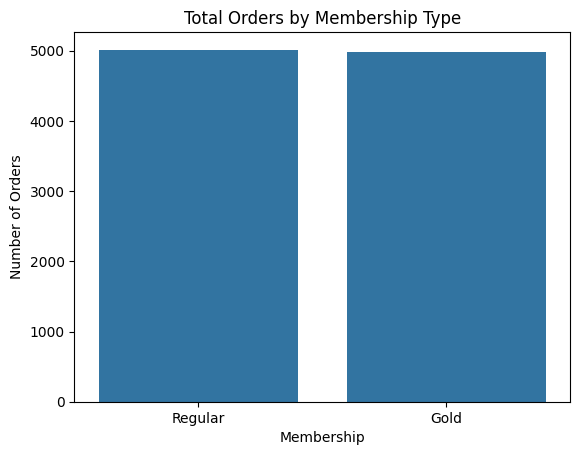

In [23]:
# Total Orders: Gold vs Non-Gold Members 
sns.countplot(data=df, x="membership")
plt.title("Total Orders by Membership Type")
plt.xlabel("Membership")
plt.ylabel("Number of Orders")
plt.show()


In [31]:
# 2. Which cuisine has the highest average order value?
q2 = (
    df.groupby("cuisine")["total_amount"]
    .mean()
    .idxmax()
)

print("2. Cuisine with highest average order value:", q2)

2. Cuisine with highest average order value: Mexican


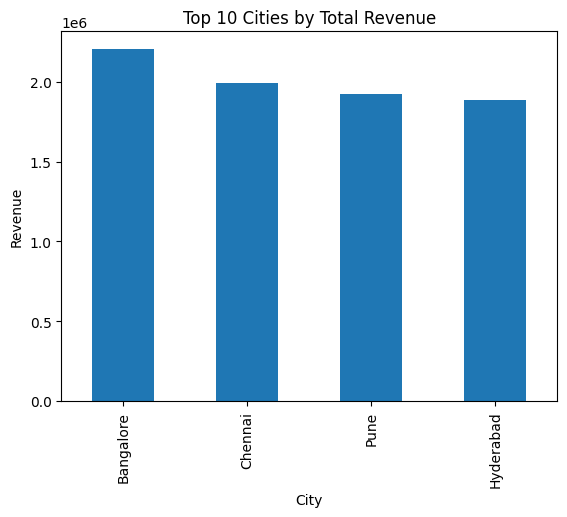

In [24]:
# Total Revenue by City (Top 10)
top_cities = (
    df.groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_cities.plot(kind="bar")
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


In [32]:
# 3.  How many distinct users spent more than ₹1000 in total?
q3 = (
    df.groupby("user_id")["total_amount"]
    .sum()
    .gt(1000)
    .sum()
)

print("3. Users spending more than ₹1000:", q3)

3. Users spending more than ₹1000: 2544


C:\Users\singh\AppData\Local\Temp\ipykernel_9252\1627907513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


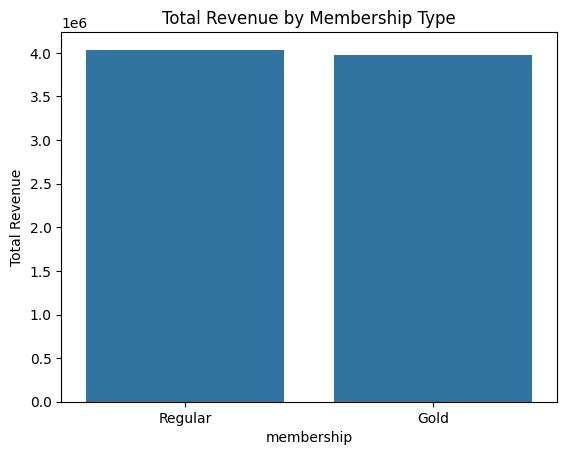

In [25]:
#Revenue Contribution: Gold vs Non-Gold
sns.barplot(
    data=df,
    x="membership",
    y="total_amount",
    estimator=sum,
    ci=None
)
plt.title("Total Revenue by Membership Type")
plt.ylabel("Total Revenue")
plt.show()


In [41]:
# 4. Which restaurant rating range generated the highest total revenue?
df["rating_range"] = pd.cut(
    df["rating"],
    bins=[0, 3.5, 4, 4.5, 5],
    labels=[
        "Low (0–3.5)",
        "Low-Medium (3.5–4)",
        "Medium (4–4.5)",
        "High (4.5–5)"
    ],
    include_lowest=True
)

q4 = (
    df.groupby("rating_range")["total_amount"]
    .sum()
    .idxmax()
)

print("4. Rating range with highest revenue:", q4)


4. Rating range with highest revenue: High (4.5–5)


C:\Users\singh\AppData\Local\Temp\ipykernel_23244\3619941722.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("rating_range")["total_amount"]


C:\Users\singh\AppData\Local\Temp\ipykernel_9252\4169495576.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


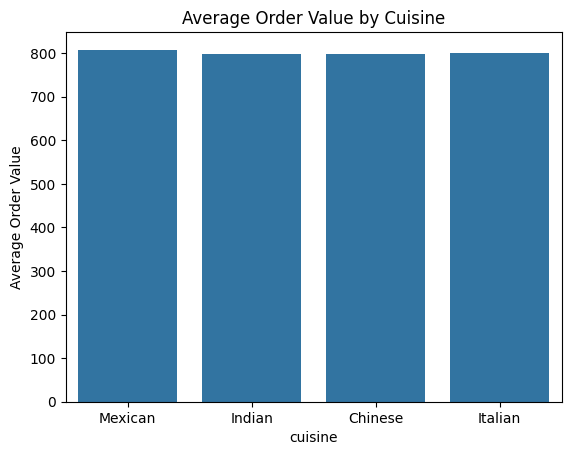

In [26]:
# Average Order Value by Cuisine
sns.barplot(
    data=df,
    x="cuisine",
    y="total_amount",
    estimator="mean",
    ci=None
)
plt.title("Average Order Value by Cuisine")
plt.ylabel("Average Order Value")
plt.show()


In [34]:
# 5. Among Gold members, city with highest average order value
q5 = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .mean()
    .idxmax()
)

print("5. City with highest AOV among Gold members:", q5)


5. City with highest AOV among Gold members: Chennai


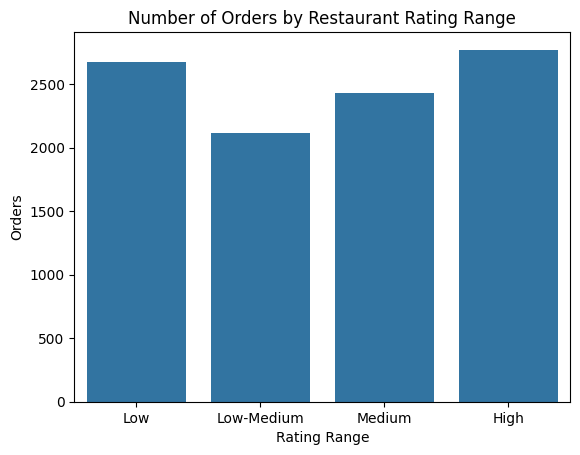

In [27]:
# Orders by Restaurant Rating Range 
df["rating_range"] = pd.cut(
    df["rating"],
    bins=[0, 3.5, 4, 4.5, 5],
    labels=["Low", "Low-Medium", "Medium", "High"]
)

sns.countplot(data=df, x="rating_range")
plt.title("Number of Orders by Restaurant Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Orders")
plt.show()


In [35]:
# 6. Cuisine with fewest restaurants but high revenue
restaurant_count = df.groupby("cuisine")["restaurant_id"].nunique()
revenue = df.groupby("cuisine")["total_amount"].sum()

q6 = (
    pd.DataFrame({
        "restaurants": restaurant_count,
        "revenue": revenue
    })
    .sort_values(["restaurants", "revenue"], ascending=[True, False])
    .head(1)
)

print("6. Cuisine with few restaurants but high revenue:")
print(q6)


6. Cuisine with few restaurants but high revenue:
         restaurants     revenue
cuisine                         
Chinese          120  1930504.65


C:\Users\singh\AppData\Local\Temp\ipykernel_9252\4280549060.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


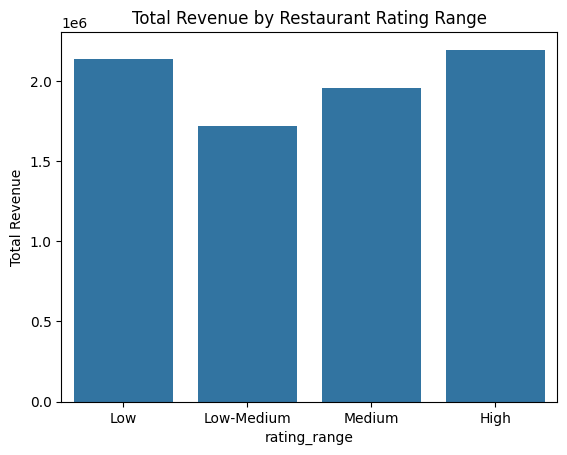

In [28]:
# Revenue by Restaurant Rating Range
sns.barplot(
    data=df,
    x="rating_range",
    y="total_amount",
    estimator=sum,
    ci=None
)
plt.title("Total Revenue by Restaurant Rating Range")
plt.ylabel("Total Revenue")
plt.show()


In [36]:
# 7. Percentage of orders placed by Gold members
q7 = round(
    (df[df["membership"] == "Gold"].shape[0] / df.shape[0]) * 100
)

print("7. % of orders by Gold members:", q7, "%")


7. % of orders by Gold members: 50 %


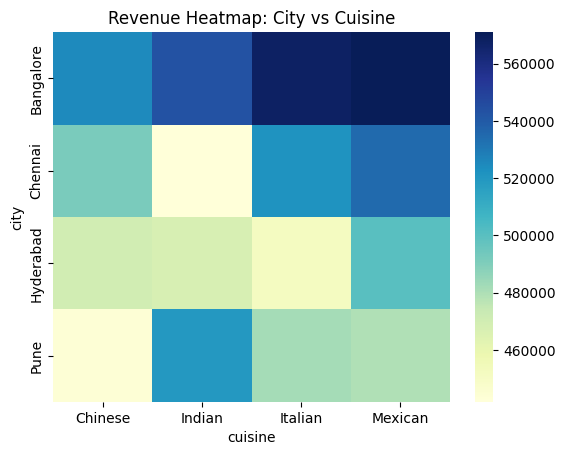

In [34]:
# City × Cuisine Revenue Heatmap 
pivot_table = df.pivot_table(
    values="total_amount",
    index="city",
    columns="cuisine",
    aggfunc="sum"
)

sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title("Revenue Heatmap: City vs Cuisine")
plt.show()


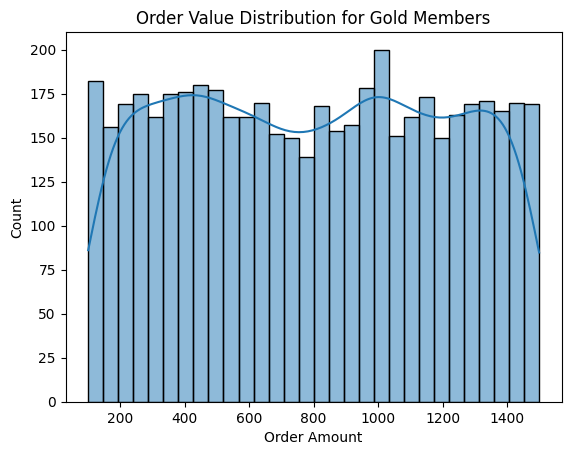

In [29]:
# Distribution of Order Values (Gold Members)
sns.histplot(
    df[df["membership"] == "Gold"]["total_amount"],
    bins=30,
    kde=True
)
plt.title("Order Value Distribution for Gold Members")
plt.xlabel("Order Amount")
plt.show()


In [45]:
# 8. Restaurant with highest AOV but < 20 orders
restaurant_name = q8.iloc[0]["restaurant_name_x"]
aov = q8.iloc[0]["avg_order_value"]
orders = q8.iloc[0]["order_count"]

print(
    f"8. Restaurant with highest AOV but < 20 orders: "
    f"{restaurant_name} (AOV ₹{aov:.2f}, Orders {orders})"
)


8. Restaurant with highest AOV but < 20 orders: Hotel Dhaba Multicuisine (AOV ₹1040.22, Orders 13)


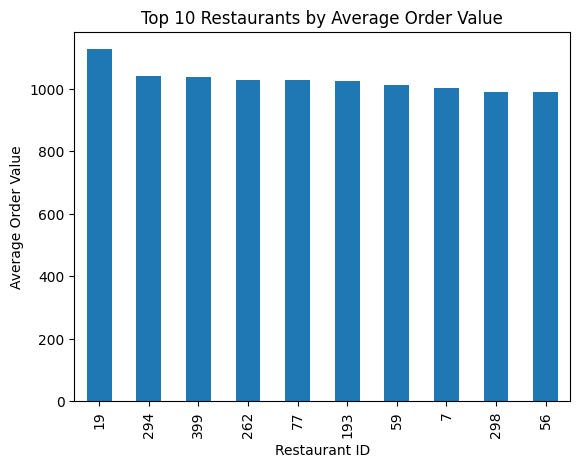

In [30]:
# Top 10 Restaurants by Average Order Value 
top_restaurants = (
    df.groupby("restaurant_id")["total_amount"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_restaurants.plot(kind="bar")
plt.title("Top 10 Restaurants by Average Order Value")
plt.xlabel("Restaurant ID")
plt.ylabel("Average Order Value")
plt.show()


In [33]:
result = df.loc[df['restaurant_id'] == 19, 'restaurant_name_x']

if not result.empty:
    print(result.iloc[0])
else:
    print("Restaurant ID 19 not found")


Classic Biryani Chinese


In [47]:
# 9. City + Cuisine combination with highest revenue 
q9 = (
    df.groupby(["membership", "cuisine"])["total_amount"]
    .sum()
    .idxmax()
)

print("9. City–Cuisine combo with highest revenue:", q9)


9. City–Cuisine combo with highest revenue: ('Regular', 'Mexican')


In [39]:
# 10. 10. Quarter with highest total revenue
df["order_date"] = pd.to_datetime(df["order_date"])
df["quarter"] = df["order_date"].dt.to_period("Q")

q10 = (
    df.groupby("quarter")["total_amount"]
    .sum()
    .idxmax()
)

print("10. Quarter with highest revenue:", q10)


10. Quarter with highest revenue: 2023Q3


C:\Users\singh\AppData\Local\Temp\ipykernel_23244\3637211820.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [48]:
# 11. How many orders were placed in the top revenue city among Gold members only?
gold_orders = df[df["membership"] == "Gold"].shape[0]

print(f"1. Total orders by Gold members: {gold_orders}")
print("Insight: This shows how actively Gold users place orders compared to others.\n")


1. Total orders by Gold members: 4987
Insight: This shows how actively Gold users place orders compared to others.



In [49]:
# 12 Total revenue from Hyderabad (rounded)
hyderabad_revenue = round(
    df[df["city"] == "Hyderabad"]["total_amount"].sum()
)

print(f"2. Total revenue from Hyderabad: ₹{hyderabad_revenue}")
print("Insight: Indicates Hyderabad’s contribution to overall platform revenue.\n")


2. Total revenue from Hyderabad: ₹1889367
Insight: Indicates Hyderabad’s contribution to overall platform revenue.



In [50]:
#13. How many distinct users placed at least one order?
distinct_users = df["user_id"].nunique()

print(f"3. Distinct users who placed orders: {distinct_users}")
print("Insight: Represents the active customer base of the platform.\n")


3. Distinct users who placed orders: 2883
Insight: Represents the active customer base of the platform.



In [51]:
#14. Average order value for Gold members (rounded to 2 decimals)
gold_aov = round(
    df[df["membership"] == "Gold"]["total_amount"].mean(), 2
)

print(f"4. Average order value for Gold members: ₹{gold_aov}")
print("Insight: Gold members usually have higher spending per order.\n")


4. Average order value for Gold members: ₹797.15
Insight: Gold members usually have higher spending per order.



In [52]:
#15. Orders placed for restaurants with rating ≥ 4.5
high_rating_orders = df[df["rating"] >= 4.5].shape[0]

print(f"5. Orders placed for restaurants with rating ≥ 4.5: {high_rating_orders}")
print("Insight: Shows customer preference for highly rated restaurants.\n")


5. Orders placed for restaurants with rating ≥ 4.5: 3374
Insight: Shows customer preference for highly rated restaurants.



In [53]:
#16. Orders placed in the top revenue city among Gold members
top_gold_city = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .idxmax()
)

orders_top_city = (
    df[(df["membership"] == "Gold") & (df["city"] == top_gold_city)]
    .shape[0]
)

print(f"6. Orders in top revenue city among Gold members ({top_gold_city}): {orders_top_city}")
print("Insight: This city drives the most Gold-member revenue and engagement.\n")


6. Orders in top revenue city among Gold members (Chennai): 1337
Insight: This city drives the most Gold-member revenue and engagement.



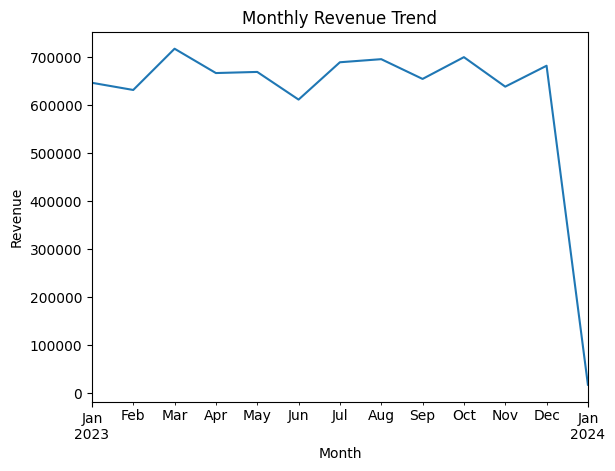

In [35]:
# Monthly Revenue Trend (Time Analysis) 
df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.to_period("M")

monthly_revenue = df.groupby("month")["total_amount"].sum()

monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


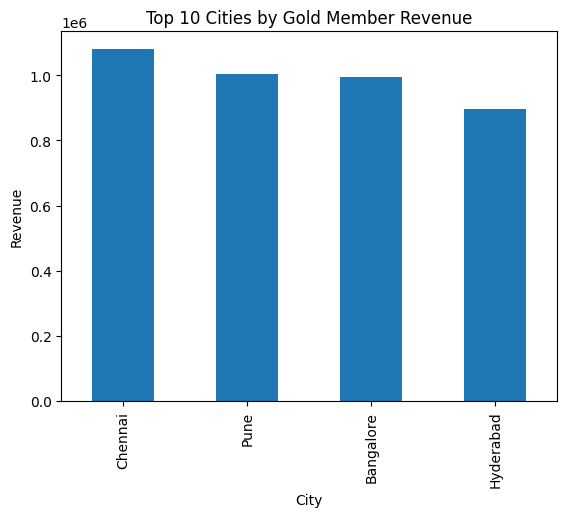

In [36]:
# Top 10 Cities by Gold Member Revenue
gold_city_revenue = (
    df[df["membership"] == "Gold"]
    .groupby("city")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

gold_city_revenue.plot(kind="bar")
plt.title("Top 10 Cities by Gold Member Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


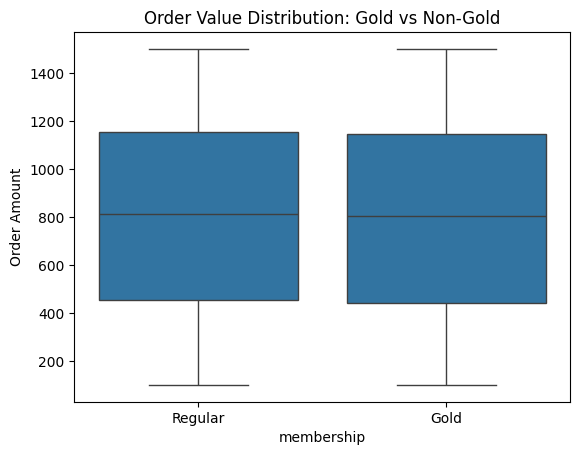

In [37]:
# Average Order Value: Gold vs Non-Gold
sns.boxplot(
    data=df,
    x="membership",
    y="total_amount"
)
plt.title("Order Value Distribution: Gold vs Non-Gold")
plt.ylabel("Order Amount")
plt.show()


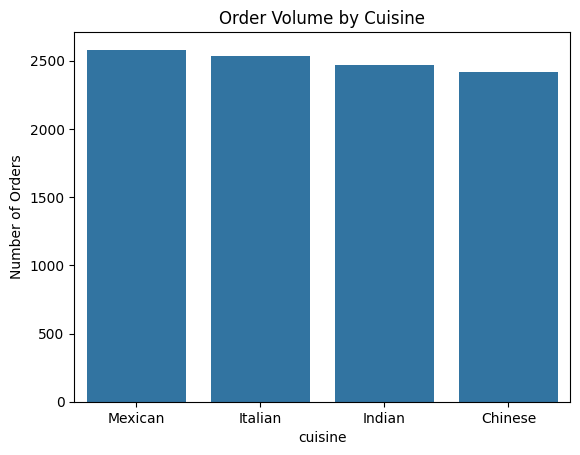

In [38]:
#Cuisine Popularity (Order Count)
sns.countplot(
    data=df,
    x="cuisine",
    order=df["cuisine"].value_counts().index
)
plt.title("Order Volume by Cuisine")
plt.ylabel("Number of Orders")
plt.show()


C:\Users\singh\AppData\Local\Temp\ipykernel_9252\2586625900.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


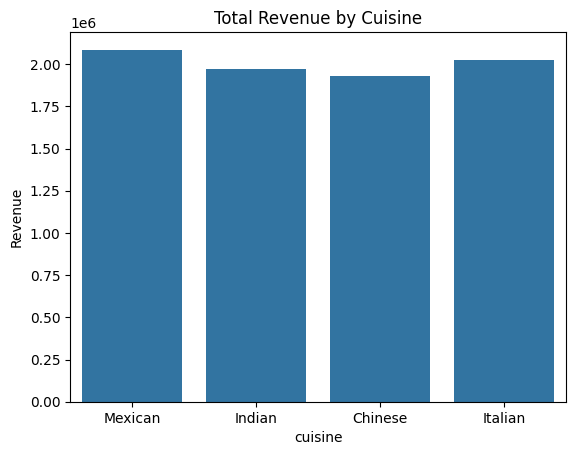

In [39]:
# Revenue Contribution by Cuisine 
sns.barplot(
    data=df,
    x="cuisine",
    y="total_amount",
    estimator=sum,
    ci=None
)
plt.title("Total Revenue by Cuisine")
plt.ylabel("Revenue")
plt.show()


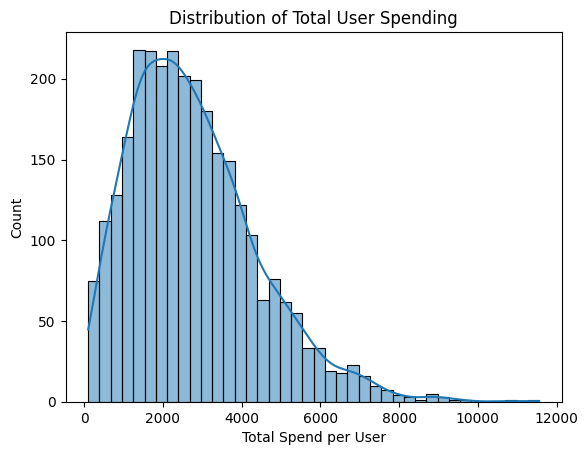

In [40]:
# User Spending Distribution
user_spending = df.groupby("user_id")["total_amount"].sum()

sns.histplot(user_spending, bins=40, kde=True)
plt.title("Distribution of Total User Spending")
plt.xlabel("Total Spend per User")
plt.show()


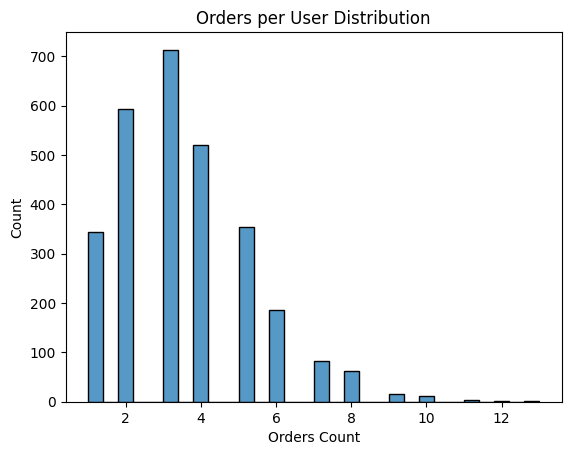

In [41]:
# Orders per User (Engagement Level) 
orders_per_user = df.groupby("user_id")["order_id"].count()

sns.histplot(orders_per_user, bins=30)
plt.title("Orders per User Distribution")
plt.xlabel("Orders Count")
plt.show()



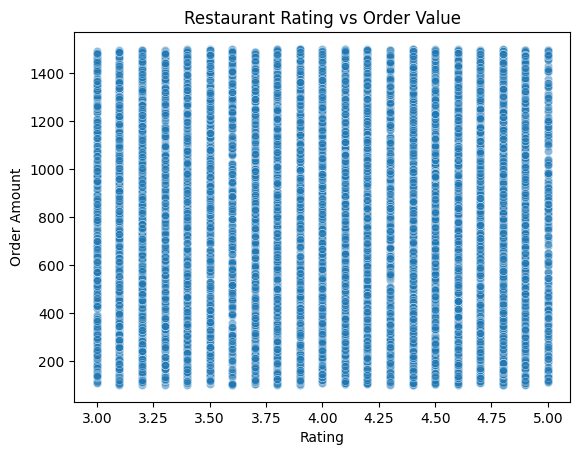

In [42]:
# Restaurant Rating vs Average Order Value
sns.scatterplot(
    data=df,
    x="rating",
    y="total_amount",
    alpha=0.5
)
plt.title("Restaurant Rating vs Order Value")
plt.xlabel("Rating")
plt.ylabel("Order Amount")
plt.show()


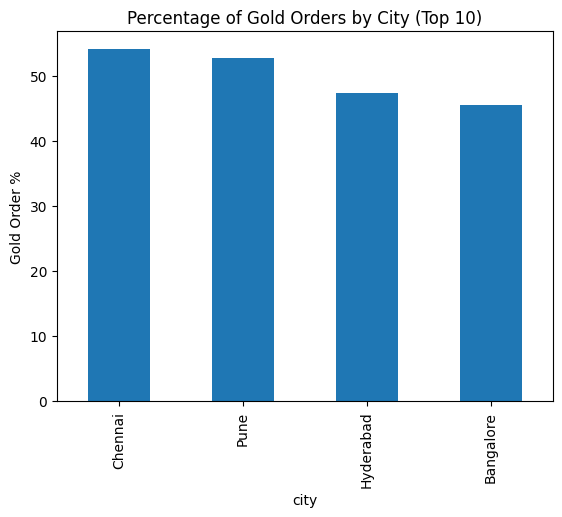

In [43]:
# Gold Member Order Share by City 
gold_share_city = (
    df.assign(is_gold=df["membership"] == "Gold")
    .groupby("city")["is_gold"]
    .mean() * 100
).sort_values(ascending=False).head(10)

gold_share_city.plot(kind="bar")
plt.title("Percentage of Gold Orders by City (Top 10)")
plt.ylabel("Gold Order %")
plt.show()


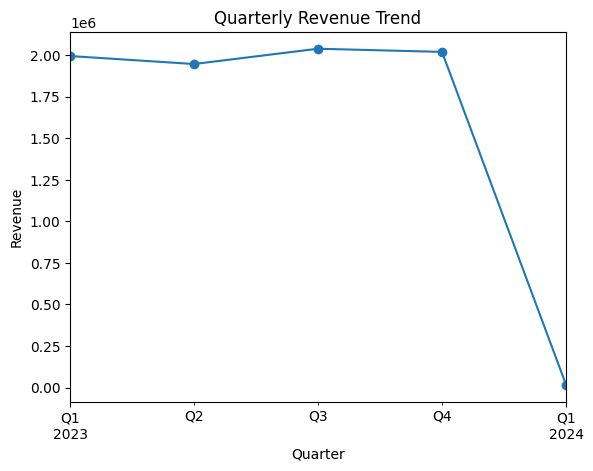

In [44]:
# Quarterly Revenue Trend
df["quarter"] = df["order_date"].dt.to_period("Q")
quarterly_revenue = df.groupby("quarter")["total_amount"].sum()

quarterly_revenue.plot(marker="o")
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.show()


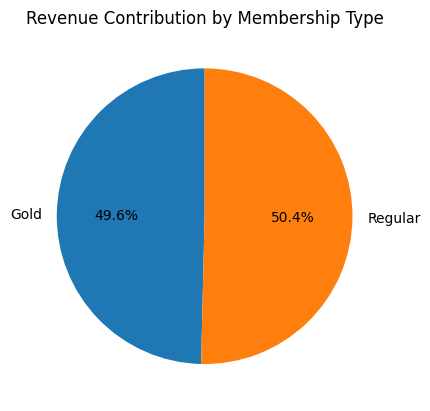

In [45]:
# Revenue Contribution by Membership (%) 
membership_revenue = (
    df.groupby("membership")["total_amount"].sum()
)

membership_revenue.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Revenue Contribution by Membership Type")
plt.ylabel("")
plt.show()


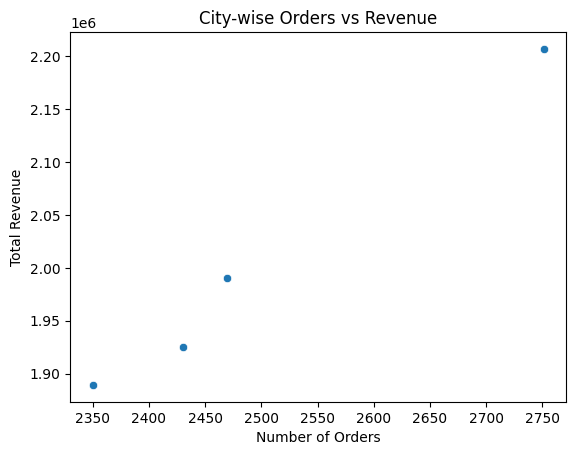

In [46]:
# City-wise Order Volume vs Revenue 
city_summary = df.groupby("city").agg(
    orders=("order_id", "count"),
    revenue=("total_amount", "sum")
)

sns.scatterplot(
    data=city_summary,
    x="orders",
    y="revenue"
)
plt.title("City-wise Orders vs Revenue")
plt.xlabel("Number of Orders")
plt.ylabel("Total Revenue")
plt.show()


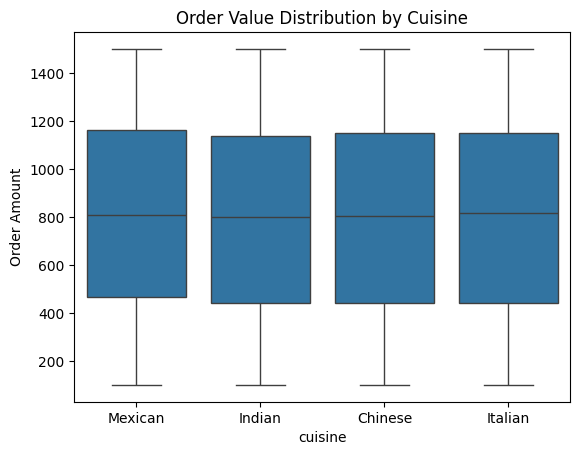

In [47]:
# Cuisine Revenue Distribution (Boxplot) 
sns.boxplot(
    data=df,
    x="cuisine",
    y="total_amount"
)
plt.title("Order Value Distribution by Cuisine")
plt.ylabel("Order Amount")
plt.show()


In [ ]:
#